In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [17]:
tf.reset_default_graph()

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./mnist/data/', one_hot = True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [11]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28 * 28
sample_size = 10

epoch: 0, cost: 0.1137490849332376
epoch: 1, cost: 0.09857419628988613
epoch: 2, cost: 0.09714877018874342
epoch: 3, cost: 0.0965455802733248
epoch: 4, cost: 0.0961407412046736
epoch: 5, cost: 0.09587987380948934
epoch: 6, cost: 0.09568006610328501
epoch: 7, cost: 0.09543336822227998
epoch: 8, cost: 0.09522271715781905
epoch: 9, cost: 0.09502255247397856
epoch: 10, cost: 0.0948355866020376
epoch: 11, cost: 0.09472184194759889
epoch: 12, cost: 0.09453063130378724
epoch: 13, cost: 0.094361294047399
epoch: 14, cost: 0.09432516612789847
epoch: 15, cost: 0.09423463614149527
epoch: 16, cost: 0.09403341019695455
epoch: 17, cost: 0.09375271161848849
epoch: 18, cost: 0.09349809815937822
epoch: 19, cost: 0.09326863726431674


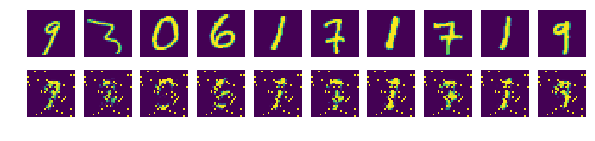

In [23]:
X = tf.placeholder(tf.float32, [None, n_input])

W1_encode = tf.Variable(tf.random_normal([n_input, 512]))
b1_encode = tf.Variable(tf.random_normal([512]))
encoder1 = tf.nn.sigmoid(tf.matmul(X, W1_encode) + b1_encode)

W2_encode = tf.Variable(tf.random_normal([512, n_hidden]))
b2_encode = tf.Variable(tf.random_normal([n_hidden]))
encoder2 = tf.nn.sigmoid(tf.matmul(encoder1, W2_encode) + b2_encode)

W1_decode = tf.Variable(tf.random_normal([n_hidden, 512]))
b1_decode = tf.Variable(tf.random_normal([512]))
decoder1 = tf.nn.sigmoid(tf.matmul(encoder2, W1_decode) + b1_decode)

W2_decode = tf.Variable(tf.random_normal([512, n_input]))
b2_decode = tf.Variable(tf.random_normal([n_input]))
decoder2 = tf.nn.sigmoid(tf.matmul(decoder1, W2_decode) + b2_decode)

cost = tf.reduce_mean(tf.pow(X - decoder2, 2))
train = tf.train.AdamOptimizer(learning_rate).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    total_batch = int(mnist.train.num_examples / batch_size)
    for epoch in range(training_epoch):
        total_cost = 0
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            _, c = sess.run([train, cost], feed_dict = {X: batch_xs})
            total_cost += c
        print('epoch: {}, cost: {}'.format(epoch, total_cost/total_batch))
    samples = sess.run(decoder2, feed_dict = {X: mnist.train.images[:sample_size]})
    fig, axes = plt.subplots(2, sample_size, figsize = (sample_size, 2))
    for i in range(sample_size):
        axes[0][i].set_axis_off()
        axes[0][i].imshow(np.reshape(mnist.train.images[i], (28, 28)))
        
        axes[1][i].set_axis_off()
        axes[1][i].imshow(np.reshape(samples[i], (28, 28)))
    plt.show()